In [2]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn as sk
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [6]:
train = pd.read_csv('C:/Users/LMatt/OneDrive/Dokumente/Mathe/Machine Learning/Projekt/digits_train.csv')
#test = pd.read_csv('C:/Users/LMatt/OneDrive/Dokumente/Mathe/Machine Learning/Projekt/digits_test.csv')

train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
images = ["%s%s" %("pixel",pixel_no) for pixel_no in range(0,28**2)]
train_images = np.array(train[images])
train_labels = np.array(train['label'])
#test_images = np.array(test)

#standardize data
data_mean = train_images.mean().astype(np.float32)
data_std = train_images.std().astype(np.float32)

def standardize(x): 
    return (x-data_mean)/data_std

train_images_standard = standardize(train_images)
#split into training and testing sets
mytrain_images, mytest_images, mytrain_labels, mytest_labels = train_test_split(train_images_standard, train_labels, test_size=0.25)

In [26]:
#function that creates image from pixel vector
def plot_image(image_vector):
    image = np.reshape(image_vector, (28, 28))
    plt.gray()
    plt.imshow(255-image)

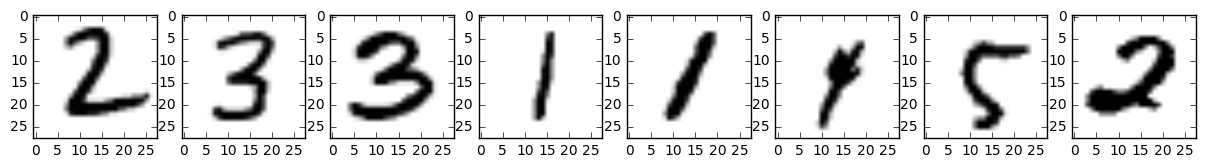

In [27]:
no_plots = 8
plt.figure(figsize=(15, 6))
for i in range(no_plots):
    plt.subplot(100+no_plots*10+i+1)
    plot_image(mytrain_images[i])

In [12]:
from sklearn import neural_network
#http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

In [13]:
#design neural network
hidden_layer_sizes = [128, 56]
neural_network = sk.neural_network.MLPClassifier(hidden_layer_sizes)
neural_network.fit(mytrain_images, mytrain_labels );  #train neural network

In [14]:
mypredictions = neural_network.predict(mytest_images) #predictions for test_images
mypredictions

array([8, 3, 6, ..., 9, 5, 4], dtype=int64)

In [15]:
error_ratio = 1-sum(mypredictions == mytest_labels)/len(mytest_labels)
error_ratio

0.028000000000000025

9
3


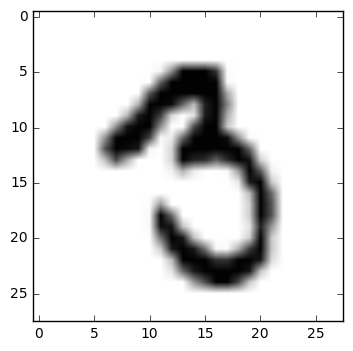

In [23]:
wrongprediction_images = mytest_images[mypredictions != mytest_labels]
wrongprediction_labels = mypredictions[mypredictions != mytest_labels]
true_labels = mytest_labels[mypredictions != mytest_labels]

plt.figure()
no = 7
plot_image(wrongprediction_images[no])
print(wrongprediction_labels[no])
print(true_labels[no])